  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="Middle">
                <font size=25px>
                    <b>  Emotion based advisor chatbot using Deep learning model
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
In today's world what lots of people need is emotional companion or an advisor. This project is based on chatbots using deep learning model where it provided emotional motivation quotes based on user's feelings.

# Data Definition:

*Here the dataset consists of chat between users and doctor regarding the psychological issues and and remedies

# Content

**[1. Import Python modules](#1)**<br>
**[2. Load dataset dictionary](#2)**<br>&emsp;
**[2.1. Descriptive statistics](#2.1)**<br>&emsp;
**[2.2. No. count of responses based on topics](#2.2)**<br>
**[3. Data modeling](#3)**<br>&emsp;
**[3.1. Data preparation](#3.1)**<br>&emsp;
**[3.2. Label encoding](#3.2)**<br>&emsp;
**[3.3. Vectorizing the data](#3.3)**<br>
**[4. Buliding the Model](#4)**<br>&emsp;
**[4.1. Fitting the model](#4.1)**<br>
**[5. Saving the Model](#5)**<br>&emsp;
**[5.1. Save the fitted tokenizer and label encoder](#5.1)**<br>
**[6. Inference - Simple chat model](#6)**<br>&emsp;
**[6.1. Chatbot](#6.1)**<br>



<a id='1'></a>
## 1. Import Python modules

In [1]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='2'></a>
## 2. Load dataset dictionary

In [3]:
df = pd.read_csv(r"E:\DS workspace\ML DL Python\Project\chat corpus\data\counsel_chat.csv", encoding='utf-8')
df.head()

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train
1,1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train
2,2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train
3,3,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Shauntai Davis-YearginPersonalized, private on...",https://counselchat.com/therapists/shauntai-da...,Therapy is essential for those that are feelin...,0,31,train
4,4,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Jordan WhiteLicensed Social Worker at Oak Root...,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not ...,0,620,train


In [12]:
df.columns

Index(['Unnamed: 0', 'questionID', 'questionTitle', 'questionText',
       'questionLink', 'topic', 'therapistInfo', 'therapistURL', 'answerText',
       'upvotes', 'views', 'split'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2129 non-null   int64 
 1   questionID     2129 non-null   int64 
 2   questionTitle  2129 non-null   object
 3   questionText   2129 non-null   object
 4   questionLink   2129 non-null   object
 5   topic          2129 non-null   object
 6   therapistInfo  2129 non-null   object
 7   therapistURL   2129 non-null   object
 8   answerText     2129 non-null   object
 9   upvotes        2129 non-null   int64 
 10  views          2129 non-null   int64 
 11  split          2129 non-null   object
dtypes: int64(4), object(8)
memory usage: 199.7+ KB


<a id='2.1'></a>
### 2.1. No. count of responses based on topics Descriptive statistics

In [5]:
df.groupby("therapistURL").agg("count").shape

(307, 11)

In [6]:
len(set(df["topic"].tolist()))

31

In [7]:
df.shape

(2129, 12)

In [8]:
len(set(df["questionLink"].tolist()))

824

In [9]:
df.groupby("questionLink").agg("count").describe()

,Unnamed: 0,questionID,questionTitle,questionText,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,2.583738,2.583738,2.583738,2.583738,2.583738,2.583738,2.583738,2.583738,2.583738,2.583738,2.583738
std,4.982621,4.982621,4.982621,4.982621,4.982621,4.982621,4.982621,4.982621,4.982621,4.982621,4.982621
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000


<a id='2.2'></a>
### 2.2. No. count of responses based on topics 

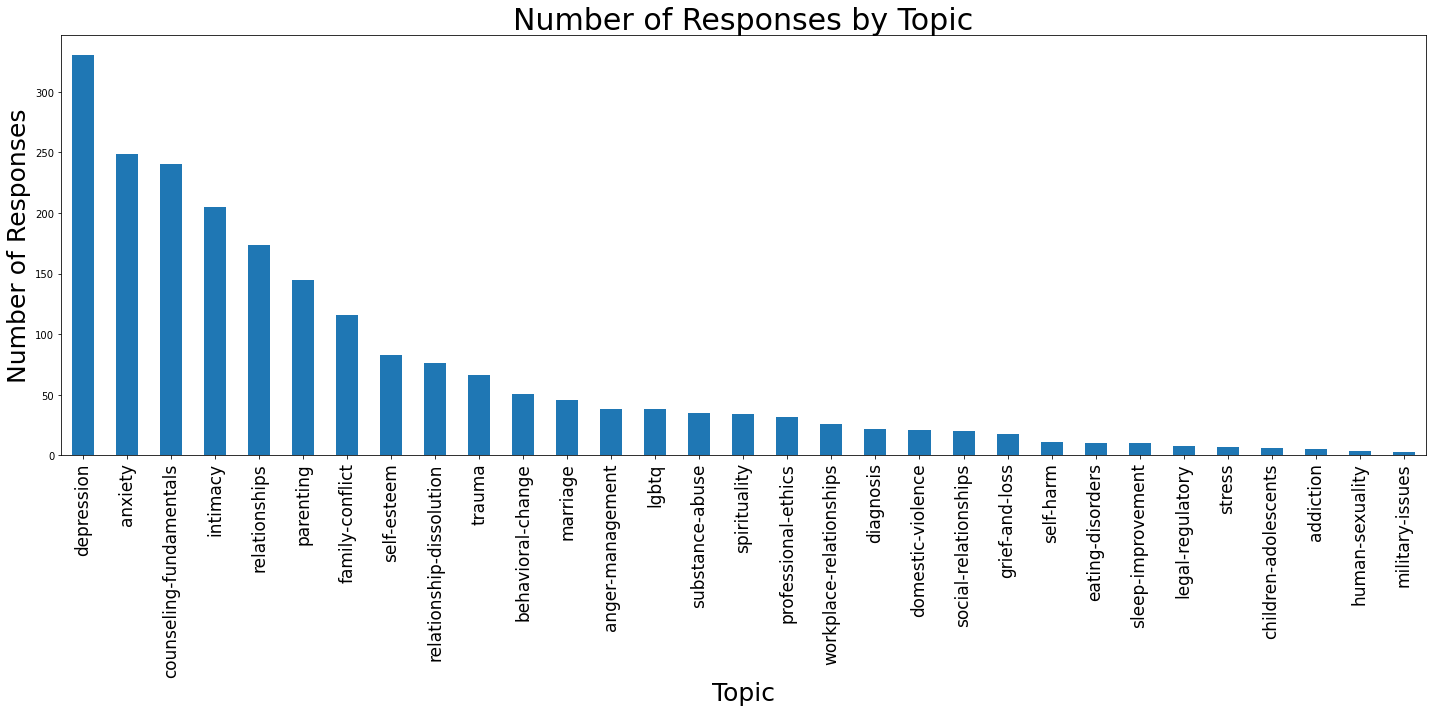

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
df.groupby("topic").agg("count")["questionID"].sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Number of Responses by Topic", fontsize=30)
ax.set_xlabel("Topic", fontsize=25)
ax.set_ylabel("Number of Responses", fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
plt.tight_layout()

<a id='3'></a>
## 3. Data modeling

### Data modeling for this chatbot is done using Excel and texteditior outside this IDE

<a id='3.1'></a>
###  3.1. Data preparation

### importing the JSON data modeled JSON file

In [16]:
with open(r"E:\DS workspace\ML DL Python\Project\chat corpus\chat_corpus - Copy.json") as file:
    data = json.load(file)

In [17]:
data

{'chat_corpus': [{'tag': 'greeting1',
   'patterns': ['Hi', 'Hey', 'Is anyone there?', 'Hello', 'whatup'],
   'responses': ['Hello', 'Hi', 'Hi there', 'Hello sunshine!']},
  {'tag': 'goodbye',
   'patterns': ['Bye', 'See you later', 'Goodbye'],
   'responses': ['See you later',
    'Have a nice day',
    'Bye! Come back again',
    'It Was a Great Pleasure Talking to You']},
  {'tag': 'thanks',
   'patterns': ['Thanks',
    'Thank you',
    'Thats helpful',
    'Thanks for the help',
    'thank you that was helpful'],
   'responses': ['Happy to help!',
    'Any time!',
    'My pleasure',
    'Youre most welcome!']},
  {'tag': 'about1',
   'patterns': ['Who are you?', 'What are you?', 'Who you are?'],
   'responses': ['Im HAL 9000 your bot assistant',
    'Im HAL 9000, an Artificial Intelligent bot']},
  {'tag': 'depression1',
   'patterns': ['Im going through some things with my feelings and myself. I barely sleep and I do nothing but think about how Im worthless and how I shouldnt be 

The variable “training_sentences” holds all the training data (which are the sample messages in each intent category) and the “training_labels” variable holds all the target labels correspond to each training data.

In [18]:
training_sentences = []
training_labels = []
labels = []
responses = []

for intent in data['chat_corpus']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

<a id='3.2'></a>
### 3.2. Label encoding

Then we use “LabelEncoder()” function provided by scikit-learn to convert the target labels into a model understandable form.

In [19]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

<a id='3.3'></a>
### 3.3. Vectorizing the data

Next, we vectorize our text data corpus by using the “Tokenizer” class and it allows us to limit our vocabulary size up to some defined number. When we use this class for the text pre-processing task, by default all punctuations will be removed, turning the texts into space-separated sequences of words, and these sequences are then split into lists of tokens. They will then be indexed or vectorized. We can also add “oov_token” which is a value for “out of token” to deal with out of vocabulary words(tokens) at inference time.

In [20]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)


The “pad_sequences” method is used to make all the training text sequences into the same size.

In [21]:
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

<a id='4'></a>
## 4. Buliding the Model

Let’s define our Neural Network architecture for the proposed model and for that we use the “Sequential” model class of Keras.

In [22]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 25)                425       
                                                                 
Total params: 18,553
Trainable params: 18,553
Non-trainable params: 0
____________________________________________________

<a id='4.1'></a>
### 4.1. Fitting the model

In [23]:
epochs = 200
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/200
2/2 [==============================] - 1s 23ms/step - loss: 3.2187 - accuracy: 0.0566
Epoch 2/200
2/2 [==============================] - 0s 0s/step - loss: 3.2158 - accuracy: 0.0943
Epoch 3/200
2/2 [==============================] - 0s 2ms/step - loss: 3.2134 - accuracy: 0.0943
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 3.2115 - accuracy: 0.1132
Epoch 5/200
2/2 [==============================] - 0s 0s/step - loss: 3.2092 - accuracy: 0.1132
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 3.2073 - accuracy: 0.1132
Epoch 7/200
2/2 [==============================] - 0s 15ms/step - loss: 3.2048 - accuracy: 0.1132
Epoch 8/200
2/2 [==============================] - 0s 0s/step - loss: 3.2024 - accuracy: 0.1132
Epoch 9/200
2/2 [==============================] - 0s 0s/step - loss: 3.2001 - accuracy: 0.1698
Epoch 10/200
2/2 [==============================] - 0s 1ms/step - loss: 3.1974 - accuracy: 0.1698
Epoch 11/200
2/2 [=============

2/2 [==============================] - 0s 1ms/step - loss: 2.2458 - accuracy: 0.2453
Epoch 85/200
2/2 [==============================] - 0s 17ms/step - loss: 2.2295 - accuracy: 0.2453
Epoch 86/200
2/2 [==============================] - 0s 12ms/step - loss: 2.2132 - accuracy: 0.2453
Epoch 87/200
2/2 [==============================] - 0s 0s/step - loss: 2.1972 - accuracy: 0.2642
Epoch 88/200
2/2 [==============================] - 0s 15ms/step - loss: 2.1796 - accuracy: 0.2830
Epoch 89/200
2/2 [==============================] - 0s 15ms/step - loss: 2.1641 - accuracy: 0.2830
Epoch 90/200
2/2 [==============================] - 0s 10ms/step - loss: 2.1458 - accuracy: 0.2830
Epoch 91/200
2/2 [==============================] - 0s 0s/step - loss: 2.1308 - accuracy: 0.3019
Epoch 92/200
2/2 [==============================] - 0s 17ms/step - loss: 2.1128 - accuracy: 0.3208
Epoch 93/200
2/2 [==============================] - 0s 0s/step - loss: 2.0944 - accuracy: 0.3208
Epoch 94/200
2/2 [============

2/2 [==============================] - 0s 5ms/step - loss: 0.8395 - accuracy: 0.7925
Epoch 168/200
2/2 [==============================] - 0s 4ms/step - loss: 0.8259 - accuracy: 0.7925
Epoch 169/200
2/2 [==============================] - 0s 0s/step - loss: 0.8123 - accuracy: 0.8113
Epoch 170/200
2/2 [==============================] - 0s 0s/step - loss: 0.8003 - accuracy: 0.8302
Epoch 171/200
2/2 [==============================] - 0s 4ms/step - loss: 0.7888 - accuracy: 0.8302
Epoch 172/200
2/2 [==============================] - 0s 0s/step - loss: 0.7773 - accuracy: 0.8302
Epoch 173/200
2/2 [==============================] - 0s 1ms/step - loss: 0.7654 - accuracy: 0.8302
Epoch 174/200
2/2 [==============================] - 0s 5ms/step - loss: 0.7546 - accuracy: 0.8302
Epoch 175/200
2/2 [==============================] - 0s 0s/step - loss: 0.7423 - accuracy: 0.8491
Epoch 176/200
2/2 [==============================] - 0s 6ms/step - loss: 0.7315 - accuracy: 0.8491
Epoch 177/200
2/2 [=========

<a id='5'></a>
## 5. Saving the Model

In [24]:
model.save("chat_model")
import pickle

INFO:tensorflow:Assets written to: chat_model\assets


INFO:tensorflow:Assets written to: chat_model\assets


<a id='5.1'></a>
### 5.1. Save the fitted tokenizer and label encoder

In [25]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

<a id='6'></a>
## 6. Inference - Simple chat model

In [26]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open(r"E:\DS workspace\ML DL Python\Project\chat corpus\chat_corpus - Copy.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['chat_corpus']:
            if i['tag'] == tag:
                print("ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))


print("Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)

Start messaging with the bot (type quit to stop)!


<a id='6.1'></a>
### 6.1. Chatbot

In [27]:
chat()

User: hi
1/1 [==============================] - 0s 102ms/step
ChatBot: Hi there
User: im feeling angry
1/1 [==============================] - 0s 16ms/step
ChatBot: I first want to let you know that you are not alone in your feelings and there is always someone there to help. You can always change your feelings and change your way of thinking by being open to trying to change. You can always make yourself available to learning new things or volunteering so that you can make a purpose for yourself.
User: im feeling depressed
1/1 [==============================] - 0s 19ms/step
ChatBot: If everyone thinks youre worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why youre not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. Maybe read some of th

In [ ]:
chat()